# Humidity prediction using MLP neural network

Similar workflow as "RF_temperature_prediction", "RF_humidity_prediction", "temperature_MLP_predictiion".

#### 1. Train machine learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_montreal = pd.read_csv("C:/PythonGIS/dataanalysis/proj/train_data_Montreal.csv")

In [3]:
train_montreal["Hour"] = pd.to_datetime(train_montreal["Time"], format="%H:%M:%S").dt.hour

In [4]:
features = [
    "Temperature_C",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour"
]

In [5]:
target = "Humidity_pct"

In [6]:
X_train = train_montreal[features]
y_train = train_montreal[target]

Scale the features for MLP prediction.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

Regulate maximum iterations for normal MLP machine learning.

In [8]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [9]:
y_train_pred = mlp.predict(X_train_scaled)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("MLP Train MAE (Montreal):", mae)
print("MLP Train RMSE (Montreal) :", rmse)

MLP Train MAE (Montreal): 9.097474989959913
MLP Train RMSE (Montreal) : 11.600920663487852


In [11]:
#MLP Train MAE (Montreal): 9.097474989959913
#MLP Train RMSE (Montreal) : 11.600920663487852

In [12]:
#MLP Train MAE (Toronto): 8.62535081794496
#MLP Train RMSE (Toronto) : 11.071445862328453

In [13]:
#MLP Train MAE (Dallas): 9.560532801412805
#MLP Train RMSE (Dallas) : 12.57206186068616

Slightly better than Random forest.

#### 2. Prediction with additional parameters

In [14]:
train_montreal["Hum_lag1"] = train_montreal["Humidity_pct"].shift(1)
train_montreal["Hum_lag24"] = train_montreal["Humidity_pct"].shift(24)
train_montreal["Hum_roll24"] = train_montreal["Humidity_pct"].rolling(24).mean()

In [15]:
train_montreal = train_montreal.dropna().reset_index(drop=True)

In [16]:
features = [
    "Temperature_C",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour",
    "Hum_lag1",
    "Hum_lag24",
    "Hum_roll24"
]

In [17]:
target = "Humidity_pct"

In [18]:
X_train = train_montreal[features]
y_train = train_montreal[target]

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=400,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=400, random_state=42)

In [21]:
y_train_pred = mlp.predict(X_train_scaled)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_train, y_train_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("MLP Train MAE (Montreal):", mae)
print("MLP Train RMSE (Montreal) :", rmse)

MLP Train MAE (Montreal): 4.305133484985602
MLP Train RMSE (Montreal) : 6.320409069181096


In [23]:
#MLP Train MAE (Montreal): 4.305133484985602
#MLP Train RMSE (Montreal) : 6.320409069181096

In [24]:
#MLP Train MAE (Toronto): 4.137204549564493
#MLP Train RMSE (Toronto) : 6.191275721990162

In [25]:
#MLP Train MAE (Dallas): 4.137204549564493
#MLP Train RMSE (Dallas) : 6.191275721990162

With additional lag features prediction was approx. two-times better than without them.

#### 3. Testing random forest model on actual weather data

In [26]:
test_montreal  = pd.read_csv("C:/PythonGIS/dataanalysis/proj/new_test_data/weather_Montreal_2023.csv")

In [27]:
test_montreal["Hour"]  = pd.to_datetime(test_montreal["Time"]).dt.hour

C:\Users\batur\AppData\Local\Temp\ipykernel_5252\3206252853.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_montreal["Hour"]  = pd.to_datetime(test_montreal["Time"]).dt.hour


In [28]:
test_montreal["Hum_lag1"] = test_montreal["Humidity_pct"].shift(1)
test_montreal["Hum_lag24"] = test_montreal["Humidity_pct"].shift(24)
test_montreal["Hum_roll24"] = test_montreal["Humidity_pct"].rolling(24).mean()

In [29]:
test_montreal = test_montreal.dropna().reset_index(drop=True)

In [30]:
features = [
    "Temperature_C",
    "Pressure_hPa",
    "Wind_Speed_kmh",
    "Wind_Direction_deg",
    "Month",
    "Day",
    "Hour",
    "Hum_lag1",
    "Hum_lag24",
    "Hum_roll24"
]

In [31]:
X_test = test_montreal[features]
y_test = test_montreal["Humidity_pct"]

In [32]:
X_test_scaled = scaler.transform(X_test)

In [33]:
y_pred_test_mlp = mlp.predict(X_test_scaled)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_mlp = mean_absolute_error(y_test, y_pred_test_mlp)
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_test_mlp))

print("MLP Test MAE (Montreal 2023):", mae_mlp)
print("MLP Test RMSE (Montreal 2023):", rmse_mlp)

MLP Test MAE (Montreal 2023): 4.026322788752558
MLP Test RMSE (Montreal 2023): 5.387302293142703


In [35]:
#MLP Test MAE (Montreal 2023): 4.026322788752558
#MLP Test RMSE (Montreal 2023): 5.387302293142703

In [36]:
#MLP Test MAE (Toronto 2023): 4.798622104177349
#MLP Test RMSE (Toronto 2023): 6.189903176549651

In [37]:
#MLP Test MAE (Dallas 2023): 4.90097608342697
#MLP Test RMSE (Dallas 2023): 6.3255405317098425

Similar situation as with Randon forest prediction. Montreal and Toronto humidity prediction performs Dallas humidity prediction. Random forest was better in Toronto humidity prediction, MLP was better in Montreal and Dallas prediction.

In [38]:
test_montreal["Datetime"] = pd.to_datetime(
    test_montreal["Year"].astype(str) + "-" +
    test_montreal["Month"].astype(str) + "-" +
    test_montreal["Day"].astype(str) + " " +
    test_montreal["Time"].astype(str)
)

In [39]:
test_montreal["Predicted_Hum"] = y_pred_test_mlp

In [40]:
jan_feb_mar = test_montreal[(test_montreal["Month"] == 1) | 
                        (test_montreal["Month"] == 2) | 
                        (test_montreal["Month"] == 3)]

In [41]:
print(jan_feb_mar.shape)

(2136, 17)


In [42]:
import matplotlib.pyplot as plt

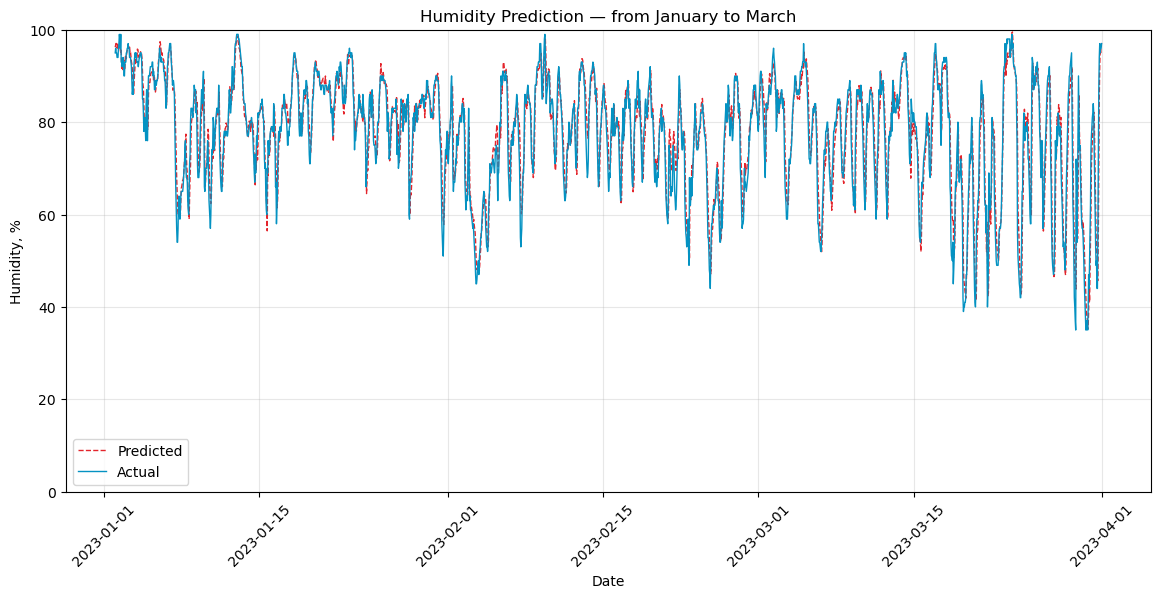

In [43]:
plt.figure(figsize=(14,6))

plt.plot(jan_feb_mar["Datetime"], jan_feb_mar["Predicted_Hum"], 
         label="Predicted", color='#E3242B', linewidth=1, linestyle="--")

plt.plot(jan_feb_mar["Datetime"], jan_feb_mar["Humidity_pct"], 
         label="Actual", color='#0492C2', linewidth=1)

plt.title("Humidity Prediction — from January to March")
plt.xlabel("Date")
plt.ylabel("Humidity, %")
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.ylim(0, 100)

plt.savefig("C:/PythonGIS/dataanalysis/proj/result/montreal_hum_jan_feb_mar_MLP.png", dpi=300, bbox_inches='tight')
plt.show()

**Repeat same for Toronto and Dallas dataset.**